# Movie Correlation Analysis in Python
**Author: Ankit Kumar**

**Date:** November 2024

### Introduction
In this project, I explored the application of data analysis techniques using Python to uncover correlations within a dataset from the movie industry. This project is part of my Data Analyst Portfolio series, aimed at demonstrating the process of analyzing relationships between different variables such as budget, revenue, and other attributes of movies. I leveraged popular **Python libraries like Pandas, Seaborn, and Matplotlib** for data analysis and visualization. My ultimate goal was to identify which factors have the most significant impact on a movie's gross revenue.

### Objective
The primary objective of this project was to conduct a correlation analysis on a movie dataset to discover key drivers of a movie's financial performance. By identifying these key factors, I aimed to provide actionable insights that could help in decision-making processes related to movie production and marketing.

### Steps Taken to Complete the Project
1. **Data Import and Setup**: I set up the Python environment and imported the necessary libraries. Using Jupyter Notebook, I leveraged Pandas for data manipulation, Numpy for numerical operations, and Seaborn/Matplotlib for data visualization. The dataset used in this project was sourced from Kaggle and contained various attributes of movies such as budget, company, genre, gross revenue, release date, etc.

2. **Data Cleaning and Preparation**: Data cleaning was a crucial step in my analysis. I checked for missing values, removed duplicates, and ensured that all columns were in the correct data type format. For example, I converted the budget and gross revenue columns from float to integer for consistency. Additionally, I created new features where necessary, such as extracting the release year from the release date.

3. **Exploratory Data Analysis (EDA)**: During the exploratory data analysis phase, I used various visualizations to identify patterns and relationships between variables. For example, I used scatter plots to visualize the relationship between budget and gross revenue. I also explored the distribution of other numerical variables and examined the frequency of categorical variables.

4. **Correlation Analysis**: A significant part of this project involved correlation analysis, where I analyzed how various features correlated with each other. I used methods like Pearson, Spearman, and Kendall to determine the correlation strength. It was discovered that budget and votes are highly correlated with gross revenue, indicating that higher budgets and audience engagement lead to better financial performance.

5. **Data Visualization**: Visualizations were crucial in my analysis. I used various plots like scatter plots, regression plots, and heatmaps to gain insights. These visualizations helped in understanding the correlations and drawing meaningful conclusions from the data.

### Conclusion
The analysis provided insightful findings, revealing that budget and votes have a strong positive correlation with movie gross revenue. This suggests that investing in a higher budget and gaining audience engagement can significantly impact a movie's financial success.


# About Dataset
**Context**
Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the movie industry, and get answers.

**Content**
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release

**Dataset Acquired from** https://www.kaggle.com/datasets/danielgrijalvas/movies/data


# Project Start

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Will adjust the config. of the plot

# Read in the data
df = pd.read_csv('E:\\Data_Analyst\\Projects\\movies.csv')

In [2]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Looking if there is any missing data or values

# for col in df.columns:
    # pct_missing = np.mean(df[col].isnull())
    # print('{} - {}%'.format(col, pct_missing))

# Looking if there is any missing data or values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    print('{} - {:.2f}%'.format(col, pct_missing))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Check for missing values in 'budget', 'gross' 'votes'  and 'runtime' columns
print("Missing values in columns before handling:")
print(df[['budget', 'gross', 'votes', 'runtime']].isnull().sum())

# Fill missing values with 0
df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)
df['votes'].fillna(0, inplace=True)
df['runtime'].fillna(0, inplace=True)
# df[['budget', 'gross', 'votes']] = df[['budget', 'gross', 'votes', 'runtime']].fillna(0)

# Check for missing values again
print("\nMissing values after handling:")
print(df[['budget', 'gross', 'votes', 'runtime']].isnull().sum())

# Convert columns to integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
# df[['budget', 'gross', 'votes']] = df[['budget', 'gross', 'votes']].astype('int64')

# Check the result
print("\nDataFrame after converting 'budget' 'gross' and 'votes to integers:")
print(df[['budget', 'gross', 'votes', 'runtime']])


Missing values in columns before handling:
budget     2171
gross       189
votes         3
runtime       4
dtype: int64

Missing values after handling:
budget     0
gross      0
votes      0
runtime    0
dtype: int64

DataFrame after converting 'budget' 'gross' and 'votes to integers:
        budget      gross    votes  runtime
0     19000000   46998772   927000      146
1      4500000   58853106    65000      104
2     18000000  538375067  1200000      124
3      3500000   83453539   221000       88
4      6000000   39846344   108000       98
...        ...        ...      ...      ...
7663      7000          0       18       90
7664         0          0       36       90
7665     58750          0       29        0
7666     15000          0        0      120
7667         0          0        7      102

[7668 rows x 4 columns]


C:\Users\kusum\AppData\Local\Temp\ipykernel_5172\2233562794.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].fillna(0, inplace=True)
C:\Users\kusum\AppData\Local\Temp\ipykernel_5172\2233562794.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

***To avoid the FutureWarning about chained assignment, we can use a more direct approach to handle missing values and change data types. Here’s how you can handle all three columns without triggering the warning:***

***Explanation:***
1. **Fill Missing Values:** Use fillna(0) directly on the columns without chaining assignment to avoid the warning.

2. **Convert Columns to Integers:** Convert each column individually to integers using astype('int64').

*By following this approach, you avoid the warning about chained assignment and ensure that the operations are performed directly on the DataFrame.*

# What was the problem?
The problem you encountered was related to the use of "chained assignment" in pandas, which can lead to a FutureWarning in your code. Specifically, it happens when you perform operations on a DataFrame or Series that involves an intermediate object, which pandas interprets as a copy. This can cause unexpected behavior when using the inplace=True argument.

**Chained Assignment Warning**
When you execute something like df['column'].method(inplace=True), pandas treats df['column'] as an intermediate object, which behaves like a copy. This means that the changes you make might not be applied to the original DataFrame. This warning is raised to alert you that the operation might not work as intended in future versions of pandas.

**Solution**
***To avoid this warning, you should either:***

1. Perform the operation on the original DataFrame directly without chaining methods that use inplace=True.

2. Assign the result back to the DataFrame without using inplace=True.

In [11]:
# Check for missing values before handling
print("Missing values before handling:")
print(df['score'].isnull().sum())

# Fill missing values with 0.0 for the 'score' column
df['score'] = df['score'].fillna(0.0)

# Check for missing values after handling
print("\nMissing values after handling and conversion to integers:")
print(df['score'].isnull().sum())

# Print the 'score' column to verify the changes
print("\nDataFrame after handling missing values in 'score':")
print(df['score'])

Missing values before handling:
3

Missing values after handling and conversion to integers:
0

DataFrame after handling missing values in 'score':
0       8.4
1       5.8
2       8.7
3       7.7
4       7.3
       ... 
7663    3.1
7664    4.7
7665    5.7
7666    0.0
7667    5.7
Name: score, Length: 7668, dtype: float64


In [13]:
# Check for missing values before handling
print("Missing values before handling:")
print(df[['rating', 'writer', 'star', 'country', 'company']].isnull().sum())

# Fill missing values with 'N\\A' (using double backslash)
df[['rating', 'writer', 'star', 'country', 'company']] = df[['rating', 'writer', 'star', 'country', 'company']].fillna('N\\A')

# Check the results after handling
print("\nMissing values after handling:")
print(df[['rating', 'writer', 'star', 'country', 'company']].isnull().sum())

print("\nDataFrame after filling null values in 'rating', 'writer', 'star', 'country', 'company':")
print(df[['rating', 'writer', 'star', 'country', 'company']])


Missing values before handling:
rating     77
writer      3
star        1
country     3
company    17
dtype: int64

Missing values after handling:
rating     0
writer     0
star       0
country    0
company    0
dtype: int64

DataFrame after filling null values in 'rating', 'writer', 'star', 'country', 'company':
     rating                   writer              star         country  \
0         R             Stephen King    Jack Nicholson  United Kingdom   
1         R  Henry De Vere Stacpoole    Brooke Shields   United States   
2        PG           Leigh Brackett       Mark Hamill   United States   
3        PG             Jim Abrahams       Robert Hays   United States   
4         R       Brian Doyle-Murray       Chevy Chase   United States   
...     ...                      ...               ...             ...   
7663    N\A            Joseph Ebanks      Shannon Bond   United States   
7664    N\A              Lisa Huston  Michael Saquella   United States   
7665    N\A        

In [15]:

# Check for missing values in the 'released' column
print("\nMissing values in 'released' column before handling:")
print(df['released'].isnull().sum())

# Replace missing values in the 'released' column with 'Unknown'
df['released'] = df['released'].fillna('Unknown')

# Check the results after handling
print("\nMissing values in 'released' column after handling:")
print(df['released'].isnull().sum())

# Print the 'released' column to verify the changes
print("\nDataFrame after filling null values in 'released' column:")
print(df['released'])



Missing values in 'released' column before handling:
2

Missing values in 'released' column after handling:
0

DataFrame after filling null values in 'released' column:
0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object


In [17]:
# Looking if there is any missing data or values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    print('{} - {:.2f}%'.format(col, pct_missing))

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%


In [24]:
df.describe

<bound method NDFrame.describe of                                                 name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    N\A      Drama  2020   
7664                                     Dream Round    N\A     Comedy  2020   
7665                                   Saving Mbango    N\A      Drama  2020   
7666                                    It's Just Us    N\A      Drama  2020   
7667                                       Tee em el    N\A     Horror  2020   

     

In [26]:

import re

# Function to reformat the released string and extract the year
def reformat_release_and_extract_year(released):
    if pd.isna(released):
        return released, None
    # Extract components using regex
    match = re.match(r'(\w+) (\d+), (\d+) \((.+)\)', released)
    if match:
        month, day, year, country = match.groups()
        # Reformat to "YYYY Month Day (Country)"
        reformatted_release = f"{year} {month} {day} ({country})"
        return reformatted_release, year
    return released, None

# Apply the function to the released column and create a new 'yearcorrect' column
df[['released', 'yearcorrect']] = df['released'].apply(lambda x: pd.Series(reformat_release_and_extract_year(x)))

# Convert the new 'yearcorrect' column to string type
df['yearcorrect'] = df['yearcorrect'].astype(str)

print("\nDataFrame after reformatting 'released' column and extracting 'yearcorrect':")
print(df)



DataFrame after reformatting 'released' column and extracting 'yearcorrect':
                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    N\A      Drama  2020   
7664                                     Dream Round    N\A     Comedy  2020   
7665                                   Saving Mbango    N\A      Drama  2020   
7666                                    It's Just Us    N\A      Drama  2020   
7667                                      

In [31]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980 June 13 (United States),8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,1980 July 2 (United States),5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980 June 20 (United States),8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,1980 July 2 (United States),7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,1980 July 25 (United States),7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,N\A,Drama,2020,2020 October 23 (United States),3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,N\A,90,2020
7664,Dream Round,N\A,Comedy,2020,2020 February 7 (United States),4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,N\A,Drama,2020,2020 April 27 (Cameroon),5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,N\A,Drama,2020,2020 October 1 (United States),0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,N\A,120,2020


In [59]:
df.dtypes

name           category
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes             int64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime           int64
yearcorrect        int8
dtype: object

In [33]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [34]:
# It will allow to display all the rows of this dataset

# pd.set_option('display.max_rows', None)

# Revert to the default setting
pd.reset_option('display.max_rows')


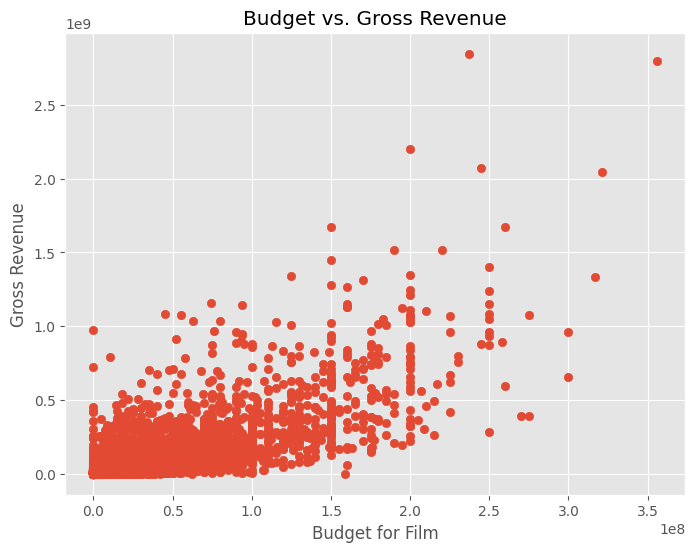

In [35]:
# Checking the correleation betwween budget vs. gross
plt.figure(figsize = (8, 6)) # Set the dimensions

plt.scatter(x = df['budget'], y = df['gross']) # Checking the correlation between budget vs. gross

plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue')

plt.show()


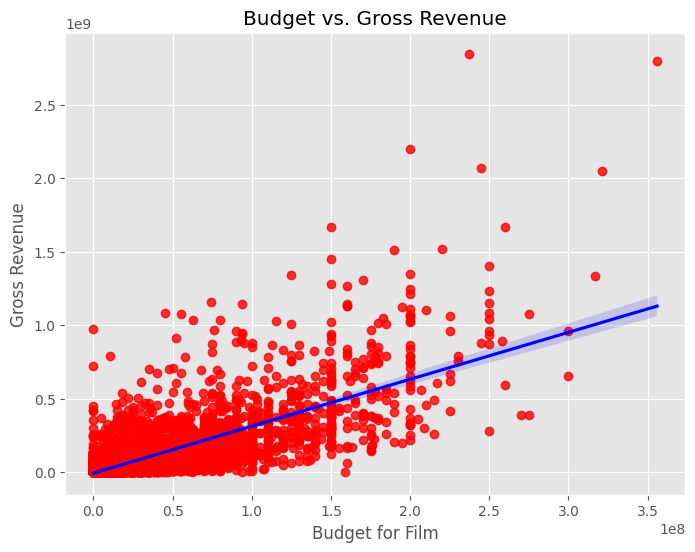

In [35]:
# Regx plot of Budget vs Gross Revenue
plt.figure(figsize = (8, 6)) # Set the dimensions of the plot

# Create a regression plot with customized line and dot colors
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws ={'color' : 'red'}, line_kws ={'color' : 'blue'}) # for line color = 'blue'

plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue')

plt.show()

In [50]:
# Installing Scipy
!pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 2.6 MB/s eta 0:00:17
   ---------------------------------------- 0.5/44.5 MB 5.8 MB/s eta 0:00:08
    --------------------------------------- 0.9/44.5 MB 7.2 MB/s eta 0:00:07
   - -------------------------------------- 1.4/44.5 MB 7.9 MB/s eta 0:00:06
   - -------------------------------------- 1.7/44.5 MB 7.9 MB/s eta 0:00:06
   - -------------------------------------- 2.2/44.5 MB 8.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/44.5 MB 8.2 MB/s eta 0:00:06
   -- 

In [37]:
# Different types of correlation

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Print non-numeric columns for reference
print("Non-numeric columns:")
print(non_numeric_columns)

# Exclude non-numeric columns when calculating the correlation matrix
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate the correlation matrix using different methods
correlation_matrix_pearson = numeric_df.corr(method='pearson')
correlation_matrix_kendall = numeric_df.corr(method='kendall')
correlation_matrix_spearman = numeric_df.corr(method='spearman')

# Print the correlation matrices
print("\nPearsonCorrelation matrix:")
print(correlation_matrix_pearson)

# print("\nKendallCorrelation matrix:")
# print(correlation_matrix_kendall)

# print("\nSpearmanCorrelation matrix:")
# print(correlation_matrix_spearman)


Non-numeric columns:
Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company', 'yearcorrect'],
      dtype='object')

PearsonCorrelation matrix:
             year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000


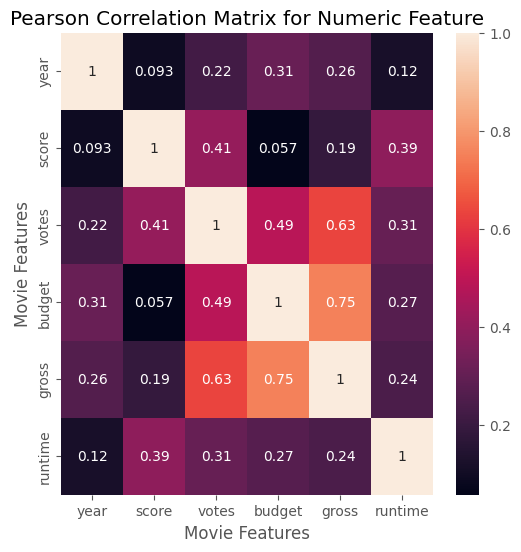

In [41]:
# Ploting pearson correlation matrix

plt.figure(figsize = (6, 6))

correlation_matrix_pearson = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix_pearson, annot = True)

plt.title('Pearson Correlation Matrix for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [57]:

# Creating a copy of the DataFrame to numerize
df_numerized = df

# Loop through each column and convert object types to categorical codes
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtypes == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Display the numerized DataFrame
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,6,0,2009,2274,7.8,1100000,1155,1778,2335,56,237000000,2847246203,2254,162,29
7445,Avengers: Endgame,6,0,2019,3253,8.4,903000,162,743,2242,56,356000000,2797501328,1606,181,39
3045,Titanic,6,6,1997,1214,7.8,1100000,1155,1778,1595,56,200000000,2201647264,2254,194,17
6663,Star Wars: Episode VII - The Force Awakens,6,0,2015,2917,7.8,876000,1125,2550,524,56,245000000,2069521700,1540,138,35
7244,Avengers: Infinity War,6,0,2018,3157,8.4,897000,162,743,2242,56,321000000,2048359754,1606,149,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,7,5,1989,695,4.5,274,117,82,2798,56,0,0,1159,92,10
1614,Edge of Sanity,7,10,1989,590,5.2,1300,1033,1743,166,55,0,0,146,85,9
1606,"I, Madman",7,8,1989,593,6.0,2900,2743,946,1195,6,0,0,2238,89,9
1601,My Twentieth Century,3,4,1989,691,7.1,1500,1105,1696,681,18,0,0,504,104,10


In [61]:
print(df_numerized.dtypes)

name           category
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes             int64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime           int64
yearcorrect        int8
dtype: object


In [63]:
df_numerized['name'] = df_numerized['name'].astype('category')
df_numerized['name'] = df_numerized['name'].cat.codes
print(df_numerized[['name']])


      name
5445   533
7445   535
3045  6896
6663  5144
7244   536
...    ...
1617  3712
1614  1745
1606  2691
1601  3836
7667  5394

[7668 rows x 1 columns]


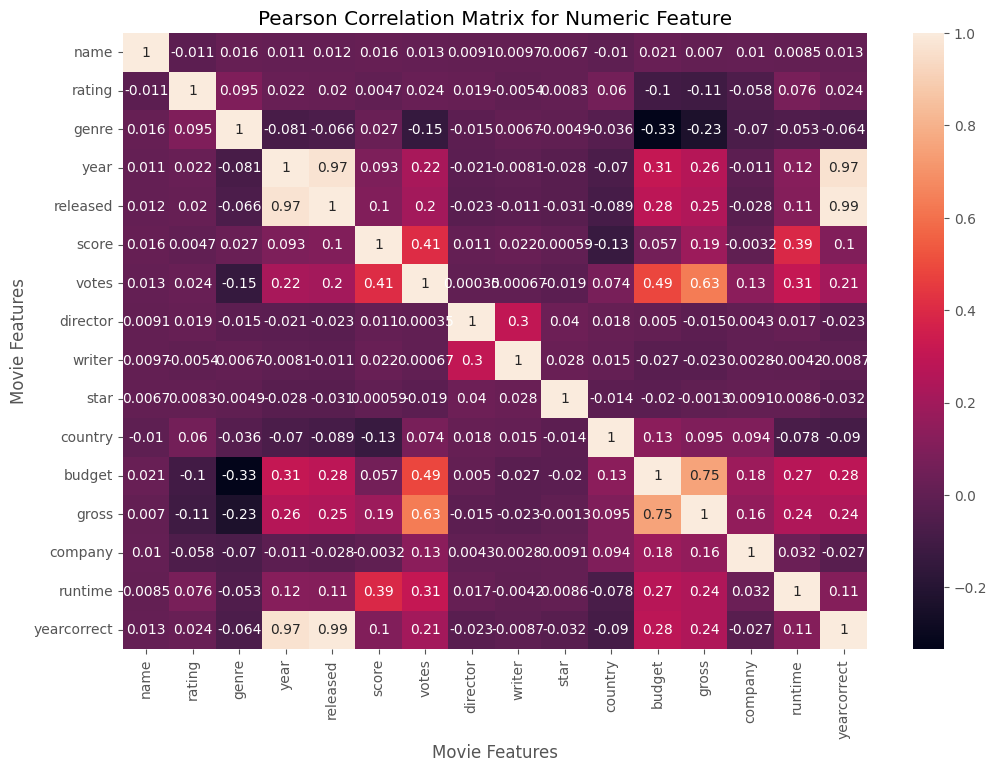

In [67]:
# Ploting pearson correlation matrix

# plt.figure(figsize = (6, 6))

correlation_matrix_pearson = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix_pearson, annot = True)

plt.title('Pearson Correlation Matrix for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [69]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011237,0.016355,0.011453,0.011989,0.016377,0.013038,0.009079,0.009733,0.006742,-0.010397,0.020548,0.006989,0.010091,0.008483,0.012835
rating,-0.011237,1.000000,0.095126,0.022121,0.020210,0.004684,0.024117,0.019494,-0.005397,0.008271,0.060419,-0.102540,-0.111325,-0.058360,0.075799,0.024084
genre,0.016355,0.095126,1.000000,-0.081261,-0.065869,0.027384,-0.145296,-0.015258,0.006701,-0.004873,-0.036475,-0.334021,-0.234297,-0.070440,-0.052914,-0.063573
year,0.011453,0.022121,-0.081261,1.000000,0.970131,0.092616,0.222427,-0.020795,-0.008141,-0.027729,-0.069946,0.309212,0.261900,-0.011197,0.116358,0.967486
released,0.011989,0.020210,-0.065869,0.970131,1.000000,0.101914,0.204089,-0.022565,-0.011197,-0.030818,-0.088952,0.281351,0.245907,-0.028438,0.110576,0.992905
score,0.016377,0.004684,0.027384,0.092616,0.101914,1.000000,0.407101,0.010568,0.022378,0.000587,-0.134223,0.056863,0.186012,-0.003152,0.394564,0.101902
votes,0.013038,0.024117,-0.145296,0.222427,0.204089,0.407101,1.000000,0.000349,0.000672,-0.019316,0.073732,0.486931,0.632870,0.131563,0.306984,0.205987
director,0.009079,0.019494,-0.015258,-0.020795,-0.022565,0.010568,0.000349,1.000000,0.299519,0.039700,0.017736,0.004976,-0.014916,0.004295,0.017062,-0.022579
writer,0.009733,-0.005397,0.006701,-0.008141,-0.011197,0.022378,0.000672,0.299519,1.000000,0.028432,0.014760,-0.026544,-0.022986,0.002806,-0.004160,-0.008710
star,0.006742,0.008271,-0.004873,-0.027729,-0.030818,0.000587,-0.019316,0.039700,0.028432,1.000000,-0.014396,-0.020153,-0.001269,0.009114,0.008556,-0.031665


In [77]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
print(corr_pairs)

name         name           1.000000
             rating        -0.011237
             genre          0.016355
             year           0.011453
             released       0.011989
                              ...   
yearcorrect  budget         0.284783
             gross          0.243478
             company       -0.026867
             runtime        0.109567
             yearcorrect    1.000000
Length: 256, dtype: float64


In [79]:
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [85]:
high_corr_pairs = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr_pairs

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
year         yearcorrect    0.967486
yearcorrect  year           0.967486
year         released       0.970131
released     year           0.970131
yearcorrect  released       0.992905
released     yearcorrect    0.992905
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


# *High Correlations:*

***Gross and Votes:*** 0.633: Shows a significant positive correlation. Films with more votes (likely indicating higher popularity) tend to have higher gross revenue.

***Gross and Budget:*** 0.750: Indicates a strong positive correlation. Higher budgets tend to result in higher gross revenue.

***Year and Yearcorrect:*** 0.967: Very high correlation, suggesting that yearcorrect is accurately reflecting the actual year values.

***Year, Yearcorrect, and Released:*** 0.970 (Year and Released), 0.993 (Yearcorrect and Released): These high correlations indicate consistency between the extracted release year and the original year information.



# *Perfect Correlations (1.000):*
*These indicate that the variables are perfectly correlated, often because they are the same variable or share identical data:*

***Self-correlations:*** Each variable with itself (name, company, gross, etc.) shows a perfect correlation, as expected.

***Yearcorrect and Released:*** Near-perfect correlation indicates precise extraction and consistency in the release year data.



# *Summary:*

***Budget and Gross Revenue:*** Higher production budgets are strongly linked to higher gross revenue.

***Votes and Gross Revenue:*** Popularity (as measured by votes) positively influences gross revenue.

***Year Data Consistency:*** The year, yearcorrect, and released columns demonstrate very high alignment, confirming accurate data extraction and consistency.


**Overall, these correlations suggest a logical consistency in the dataset with significant relationships between budget, votes, and gross revenue.**